# Importing requiered libraries

In [3]:
import pandas as pd  # لتحميل البيانات ومعالجتها
import matplotlib.pyplot as plt  # للرسوم البيانية
from sklearn.linear_model import LinearRegression  # نموذج الانحدار الخطي
from sklearn.model_selection import train_test_split  # لتقسيم البيانات
from sklearn.metrics import mean_absolute_error, mean_squared_error  # لقياس دقة النموذج
import numpy as np  
import seaborn as sns #for charts and visualization

# uploading dataset

In [5]:
irisData= pd.read_csv(r'Iris.csv')
#uplaoding dataset from my device
pd.read_csv(r'Iris.csv')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica


# Dataset overview

In [7]:
irisData.shape #(n_rows, n_columns)

(149, 6)

In [8]:
irisData.head(3) #display first 3 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [9]:
irisData.tail(3) #display last 3 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


##  make a copy from dataset "Iris" named "temp"

In [11]:
temp=irisData.drop('Id',axis=1)
#drop Id column as is not necessary so it can confuse the model while training
print(temp)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
144            6.7           3.3            5.7           2.5  Iris-virginica
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica

[149 rows x 5 columns]


## data cleaning

In [13]:
#checking for missing values
missing = temp.isnull().sum() # رح يجمعلي عدد ال null الموجودة في العمود
print(f'missing: {missing}\n')
#Checking for duplicates
duplicates = temp.duplicated().sum()
print(f"\n duplicates: {duplicates}")

missing: SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


 duplicates: 3


### Removing duplicates

In [15]:
if duplicates > 0:
    temp = temp.drop_duplicates()
    print("duplicated rows has been deleted successfully")
else:
    print("no duplicated rows found")

duplicated rows has been deleted successfully


## Dataset exploration

### Heat map display the Correlation between attributes in the dataset

<Axes: >

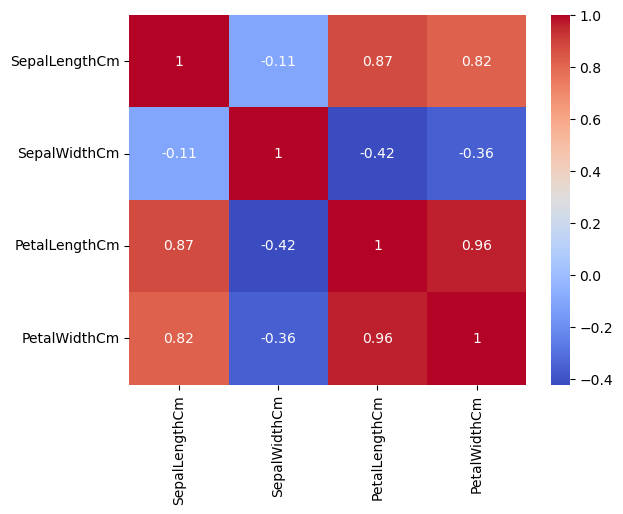

In [18]:
cor = temp.select_dtypes(include='number').corr() #  only numeric data can be shown 
sns.heatmap(cor, annot=True, cmap='coolwarm')

## Modelling

### Choosing 2 attributes (independant, dependant) to implement the model on

In [21]:
X = temp[["PetalLengthCm"]]  # Independat variable (explanotry)
y = temp["PetalWidthCm"]  # Dependant variable

### Splitting data into trainig and testing sets

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#testing = 33% from the whole data
# trainging = 67% from the whole data

### Create Simple linear regression model

In [25]:
model = LinearRegression()  # create regression model object
model.fit(X_train, y_train)  # train the model on the trainig set

LinearRegression()

### making prediction and evaluating performance

In [27]:
y_pred = model.predict(X_test)  # التنبؤ باستخدام البيانات الجديدة
mae = mean_absolute_error(y_test, y_pred)  # الخطأ المطلق
mse = mean_squared_error(y_test, y_pred)  # الخطأ التربيعي
rmse = np.sqrt(mse)  # الجذر التربيعي للخطأ التربيعي

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


MAE: 0.15304703813966788
MSE: 0.04178127836770571
RMSE: 0.20440469262643093


## Visiualization

### Scatter plot Linear regression

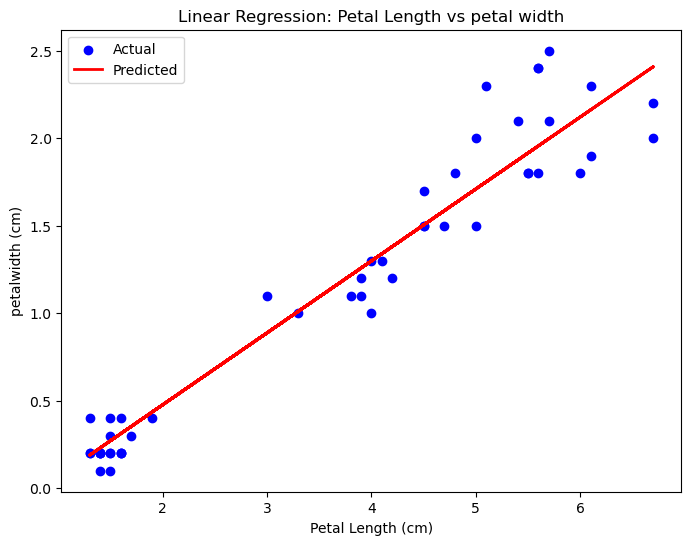

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')  # النقاط الحقيقية
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')  # خط التنبؤ
plt.title("Linear Regression: Petal Length vs petal width")
plt.xlabel("Petal Length (cm)")
plt.ylabel("petalwidth (cm)")
plt.legend()
plt.show()


### Residuale plot for the simple linear regression model

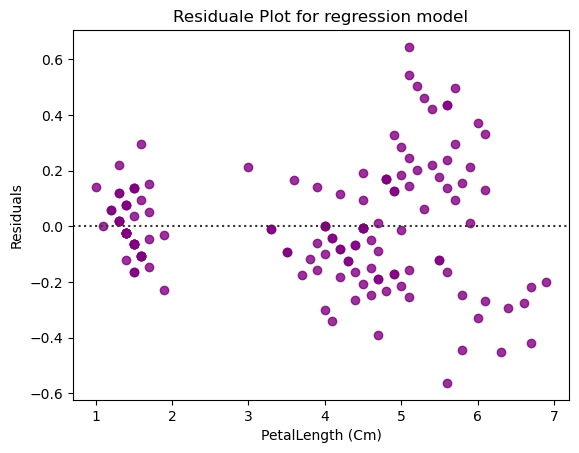

In [32]:
sns.residplot (x= 'PetalLengthCm' , y = 'PetalWidthCm' , data = temp , color = 'purple')
plt.title ('Residuale Plot for regression model')
plt.xlabel('PetalLength (Cm)')
plt.ylabel('Residuals')
plt.show()

### Line plot: Actual vs Predicted values

<function matplotlib.pyplot.show(close=None, block=None)>

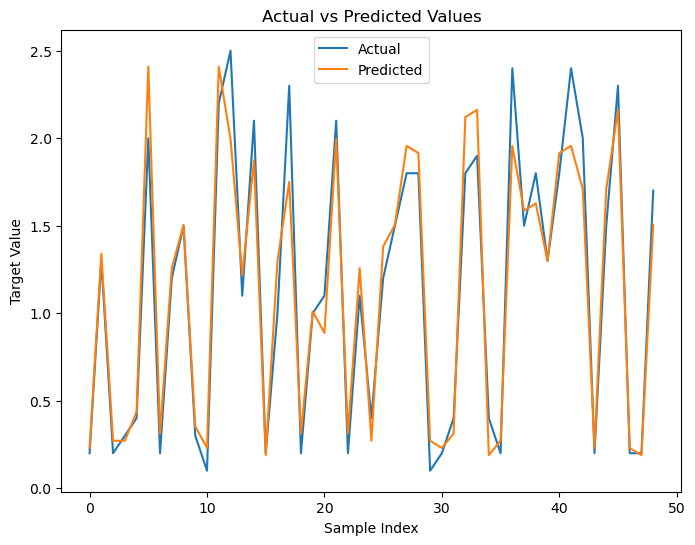

In [61]:
plt.figure(figsize=(8,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.show